In [1]:
import os
%env OPEN_API_KEY=os.getenv('OPENAI_API_KEY')

env: OPEN_API_KEY=os.getenv('OPENAI_API_KEY')


In [3]:
%load_ext jupyter_ai

In [5]:
%%ai chatgpt
Please, provide a roadmap for exploratory data analysis in a optical biometry dataset which consists of 1500 samples with the following features: AL, ACD, WTW, K1 and K2. Each sample is annotated as normal eye or not. My objective is to classify with machine learning.

# Exploratory Data Analysis Roadmap for Optical Biometry Dataset

## 1. Load the Dataset
- Load the dataset containing 1500 samples with features AL, ACD, WTW, K1, and K2, and annotations for normal eye or not.

## 2. Data Exploration
- Check the first few rows of the dataset to understand the data structure.
- Check for missing values in the dataset and handle them if necessary.
- Check the distribution of the target variable (normal eye or not) to understand class balance.

## 3. Descriptive Statistics
- Calculate basic statistics (mean, median, standard deviation, etc.) for each feature.
- Visualize the distribution of each feature using histograms or box plots.

## 4. Feature Analysis
- Explore the relationships between features using scatter plots or correlation matrices.
- Analyze the distribution of each feature for normal eye and not eye samples.

## 5. Feature Engineering
- Create new features if necessary by combining or transforming existing features.
- Encode categorical variables if present in the dataset.

## 6. Data Preprocessing
- Split the dataset into training and testing sets.
- Scale the features if necessary to ensure all features have the same scale.

## 7. Machine Learning Model Building
- Choose a classification algorithm suitable for the dataset (e.g., Decision Tree, Random Forest, Support Vector Machine).
- Train the model on the training set and evaluate its performance on the testing set using appropriate metrics (e.g., accuracy, precision, recall).

## 8. Model Evaluation
- Fine-tune the model hyperparameters using techniques like grid search or random search.
- Evaluate the model performance using cross-validation to ensure its generalizability.

## 9. Interpret Results
- Interpret the model's performance metrics and understand its predictive power.
- Analyze the most important features in the model for classification.

By following this roadmap, you can effectively explore the optical biometry dataset and build a machine learning model for classifying normal eye samples.

In [52]:
import pandas as pd

data = pd.read_csv('barrettII_eyes_clustering.csv', decimal=",").drop("ID", axis=1)
data

,AL,ACD,WTW,K1,K2,Correto
0,23.79,3.32,12.0,43.60,44.29,S
1,24.60,3.39,12.3,42.03,43.95,S
2,24.59,3.51,12.3,42.83,43.05,S
3,24.04,2.96,12.0,42.35,42.83,S
4,24.80,2.44,12.2,41.01,41.67,S
...,...,...,...,...,...,...
1523,23.32,3.29,12.5,43.16,43.95,S
1524,23.59,3.19,13.0,42.72,43.60,N
1525,26.18,3.83,12.1,43.44,44.18,S
1526,24.09,2.77,12.6,42.83,43.72,S


In [53]:
data.describe()

,AL,ACD,WTW,K1,K2
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,23.486525,3.106728,11.975098,43.469188,44.370386
std,1.142280,0.428881,0.431712,1.745504,1.767765
min,20.150000,1.130000,9.900000,30.930000,33.950000
25%,22.760000,2.830000,11.700000,42.450000,43.270000
50%,23.360000,3.080000,12.000000,43.490000,44.290000
75%,24.080000,3.360000,12.300000,44.530000,45.490000
max,30.960000,5.230000,13.300000,49.410000,52.410000


In [54]:
data.groupby('Correto').mean()

,AL,ACD,WTW,K1,K2
Correto,,,,,
N,23.456054,3.134103,11.951570,43.517422,44.409753
S,23.499085,3.095444,11.984797,43.449307,44.354159


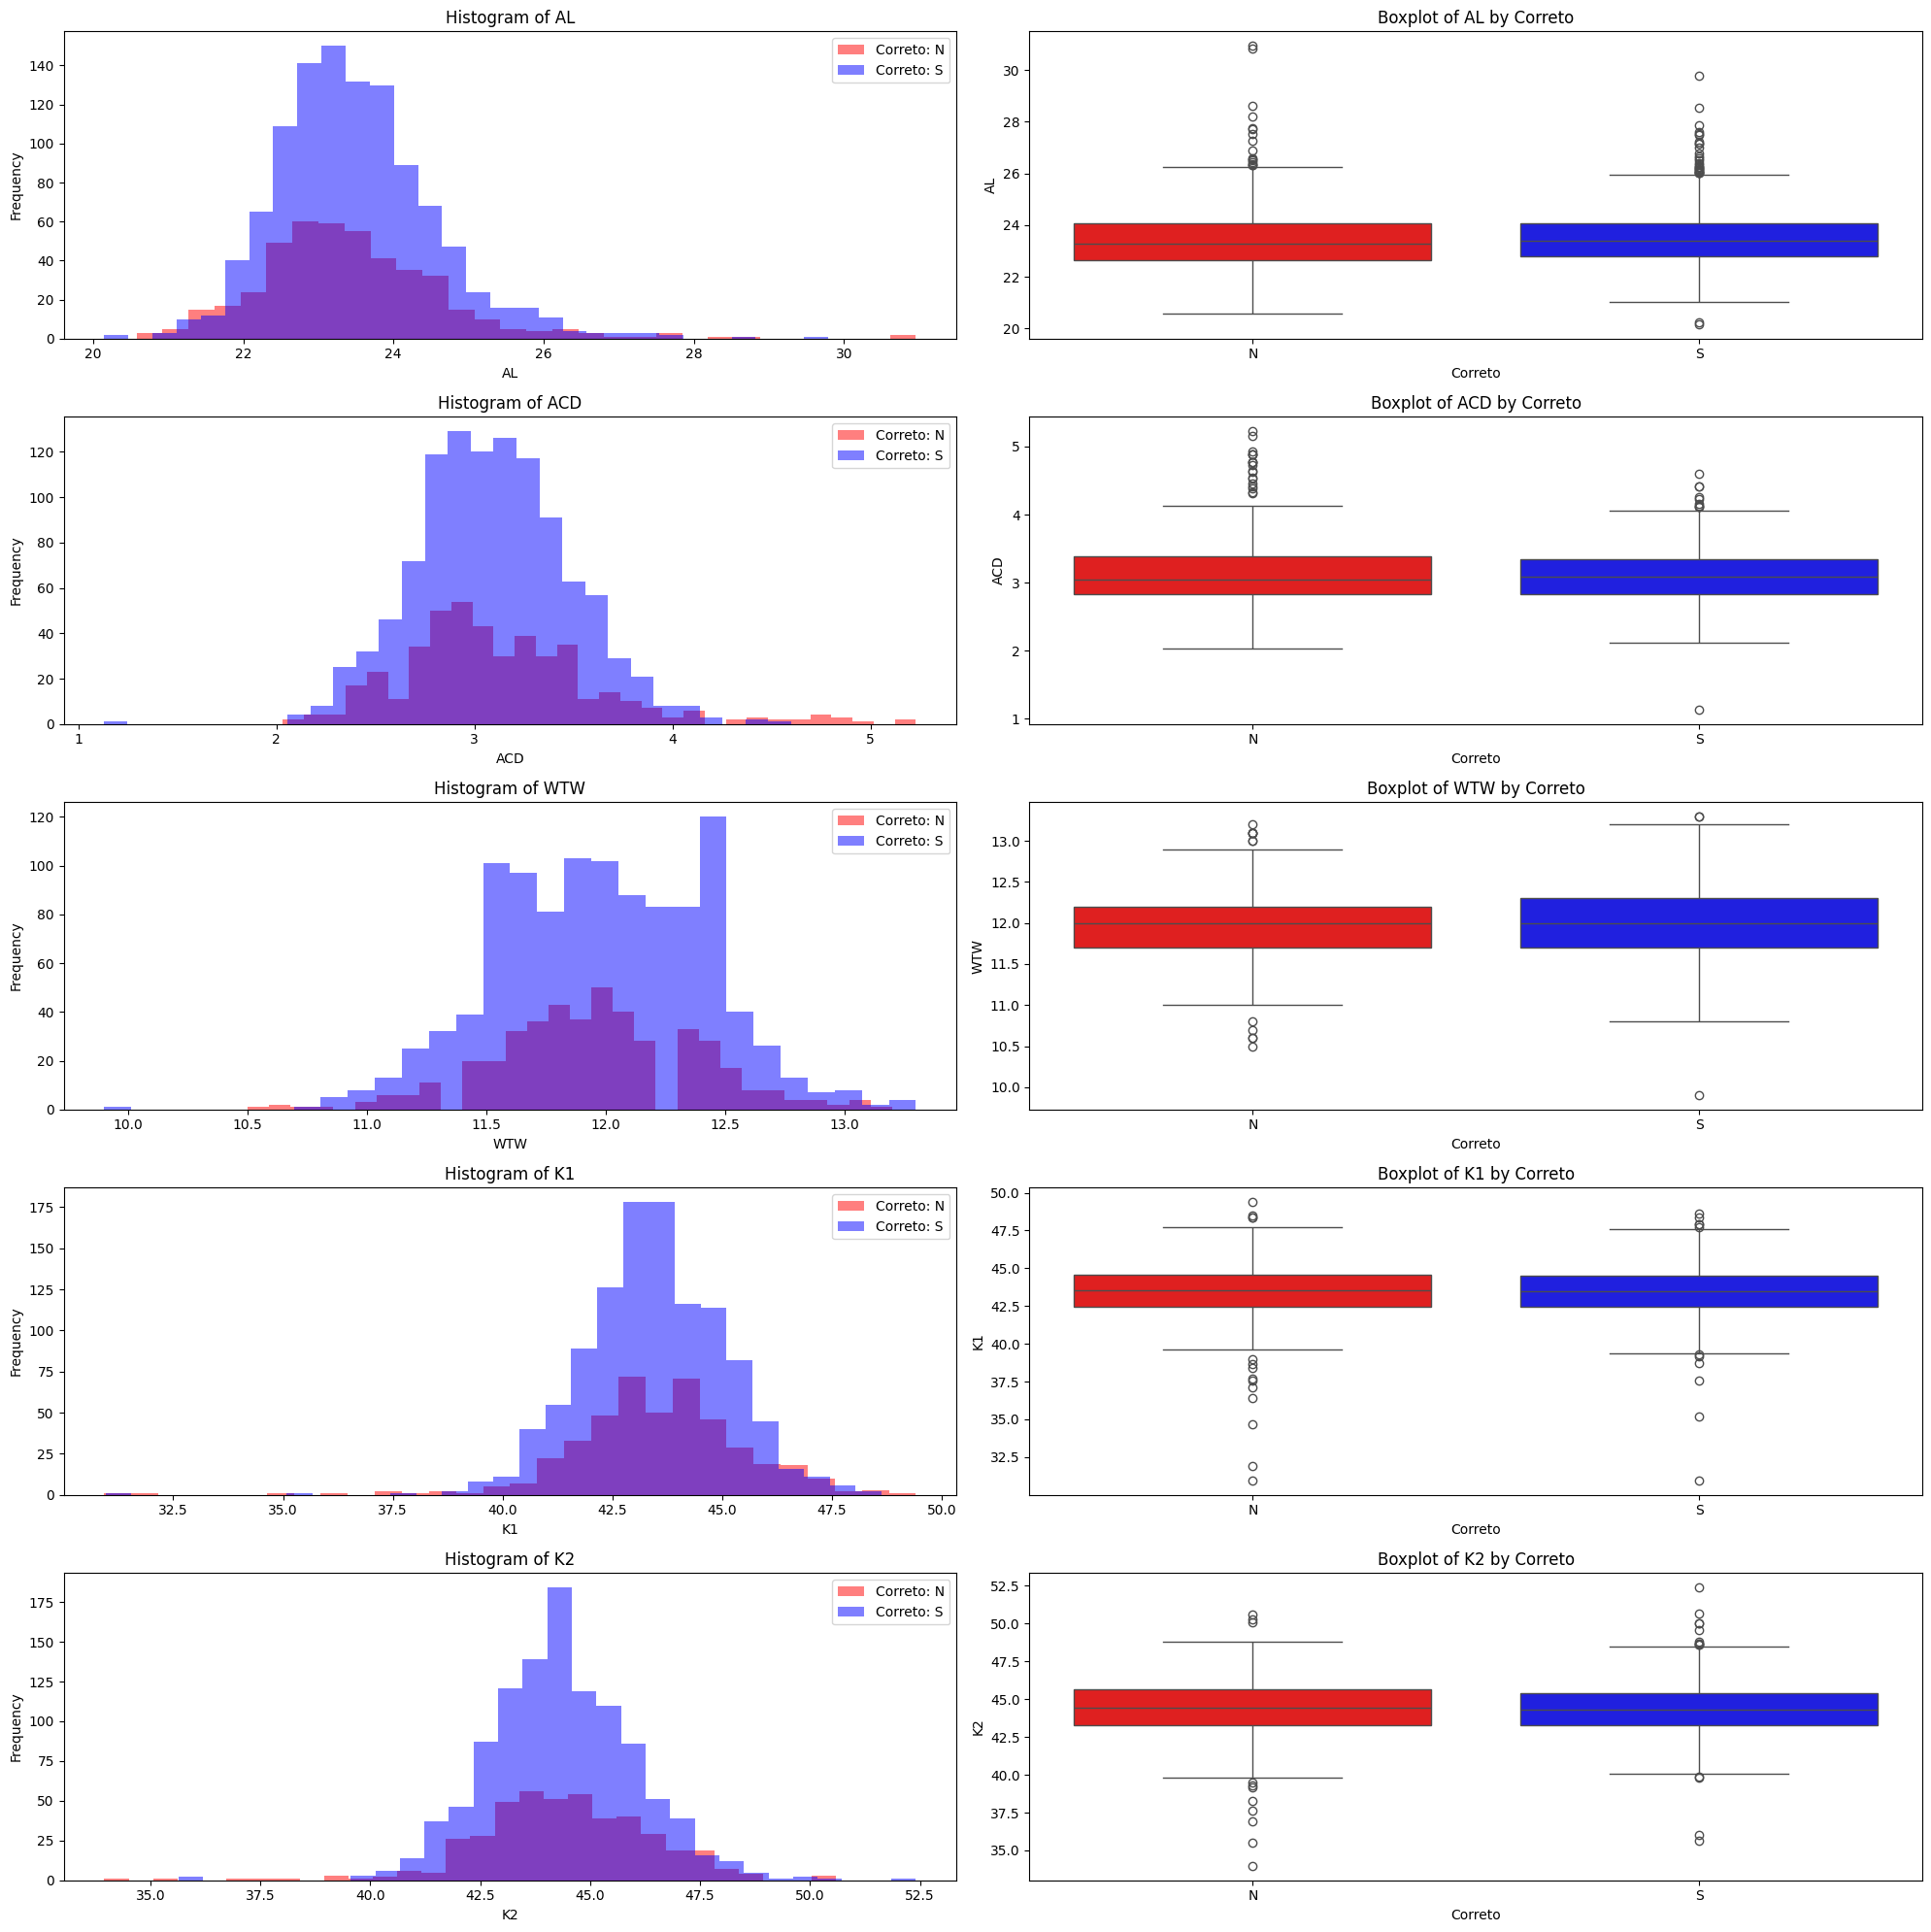

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and it has been loaded appropriately

# First, ensure 'Correto' is categorical for the coloring to make more sense
data['Correto'] = data['Correto'].astype('category')

# Then, separate the data based on the 'Correto' column for coloring purposes
colors = {'S': 'blue', 'N': 'red'}  # Define colors for categories

# Set up the matplotlib figure (2 rows, 1 column)
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

# Plotting both histograms and boxplots for each numerical variable
for idx, column in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    
    # Histogram
    for key, group_data in data.groupby('Correto', observed=False):
        axs[idx][0].hist(group_data[column], bins=30, alpha=0.5, label=f'Correto: {key}', color=colors[key])
    axs[idx][0].set_title(f'Histogram of {column}')
    axs[idx][0].set_xlabel(column)
    axs[idx][0].set_ylabel('Frequency')
    axs[idx][0].legend()
    
    # Boxplot
    sns.boxplot(x='Correto', y=column, data=data, ax=axs[idx][1], hue="Correto", palette=colors)
    axs[idx][1].set_title(f'Boxplot of {column} by Correto')
    axs[idx][1].set_xlabel('Correto')
    axs[idx][1].set_ylabel(column)
    
    plt.tight_layout()
plt.show()

In [63]:
%%ai chatgpt -f code
generate scatter plots and correlation matrices for all columns; add hue by "Correto"

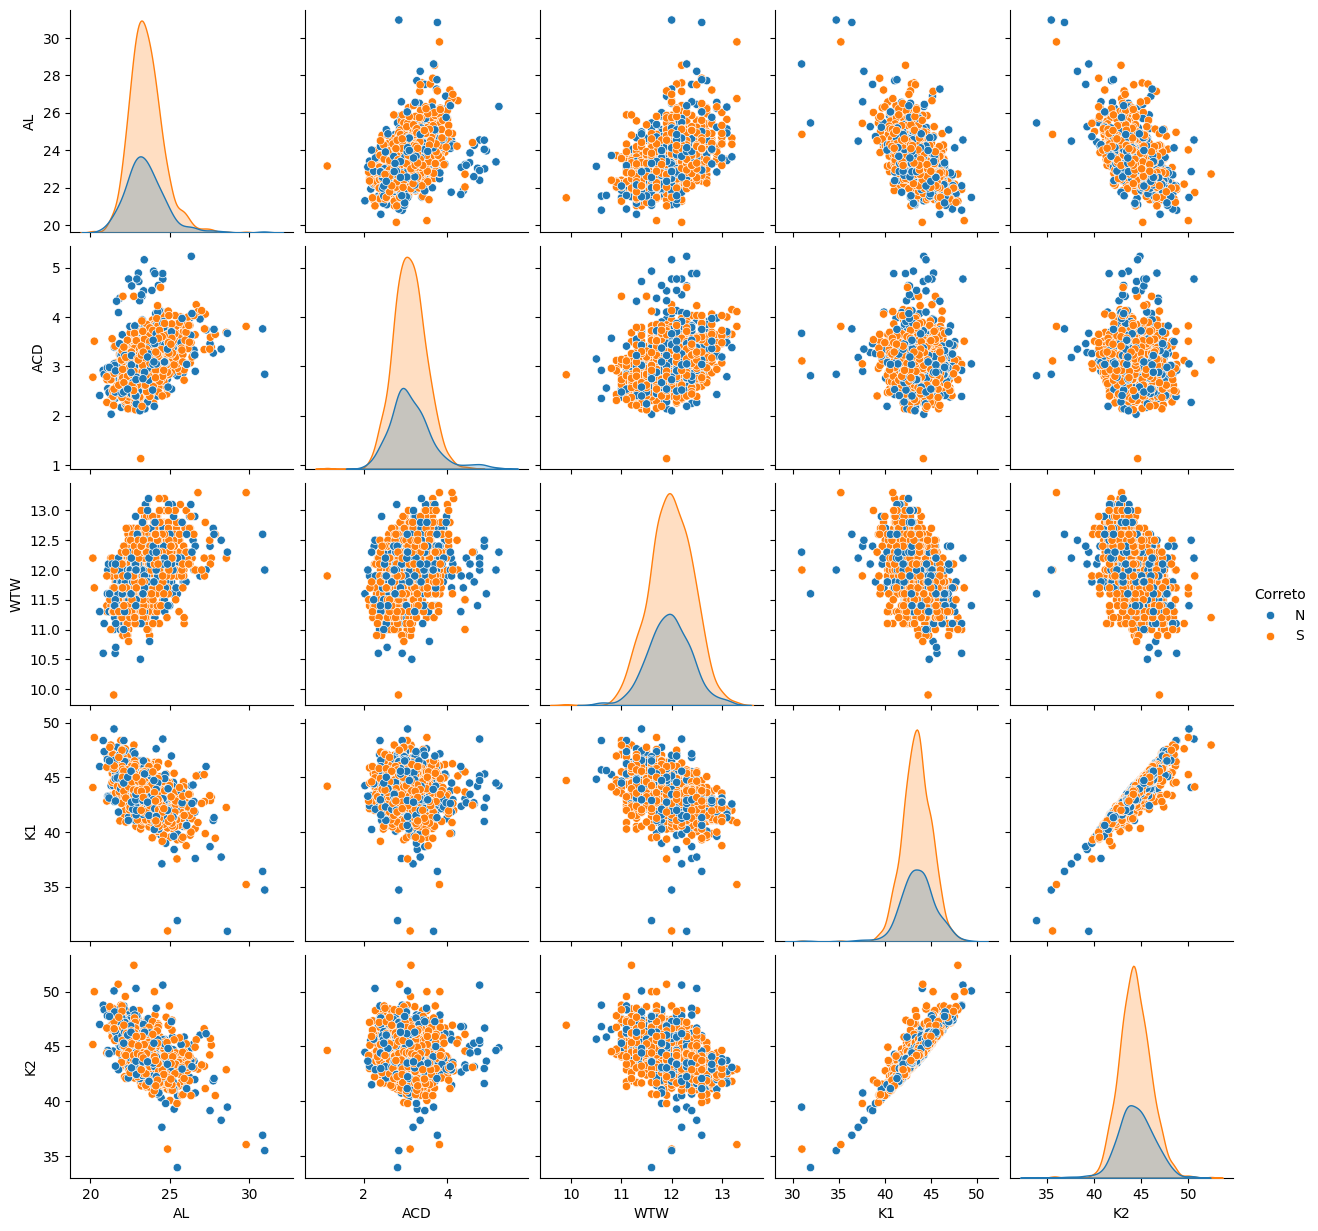

In [64]:
# Scatter plots for all columns with hue by "Correto"
sns.pairplot(data, hue='Correto')
plt.show()

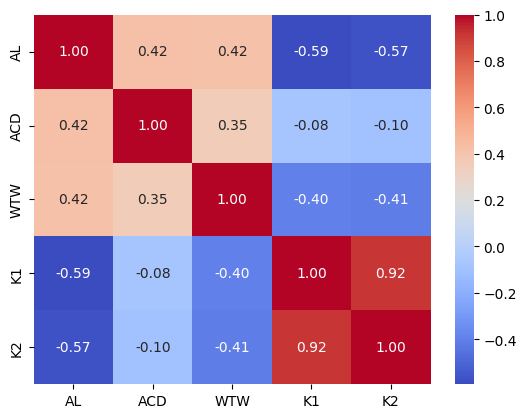

In [67]:
# Correlation matrix
corr = data.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Correlation and scatter plot analysis between features in a dataset can teach you several things:

1. **Relationship Strength and Direction**:
   - **Correlation**: It quantifies the strength and direction of the relationship between two variables. A correlation coefficient close to 1 indicates a strong positive relationship, -1 indicates a strong negative relationship, and 0 indicates no linear relationship.
   - **Scatter Plot**: Visually assesses the relationship. A clear upward trend indicates a positive relationship, a downward trend indicates a negative relationship, and a lack of trend indicates little to no linear relationship.

2. **Linearity**:
   - Scatter plots can help you assess whether the relationship between variables is linear or if there are non-linear patterns that correlation might not capture effectively.

3. **Outliers**:
   - Scatter plots can reveal outliers—data points that deviate significantly from the overall pattern. These may indicate data entry errors, special cases, or novel insights.

4. **Clustering**:
   - Scatter plots can reveal clusters or groups within the data, indicating that there may be subgroups within your dataset that behave differently.

5. **Homoscedasticity**:
   - The scatter plot can help assess if the variance of one variable is constant across different values of another variable. Homoscedasticity (constant variance) is an assumption in many statistical analyses.

6. **Data Distribution**:
   - While correlation coefficients don't provide information on the distribution of data points, scatter plots can help you visually assess the distribution and spread of data across variables.

7. **Assumption Checking**:
   - Scatter plots are useful for checking assumptions in modeling, such as the linearity assumption in linear regression.

8. **Feature Selection**:
   - High correlation between two features might indicate redundancy, suggesting that one of them can be removed without losing significant information, which is useful in feature selection processes.

9. **Causality Warning**:
   - It's crucial to remember that correlation and patterns observed in scatter plots do not imply causation. Further analysis is required to establish causal relationships.
